In [1]:
#신경망 -> 비트 코인 가격 예측 모델 (RNN 과제)
# RNN -> 주식 예측 모델
# 시계열 데이터(시간이 흐름에 따라 영향을 받는, 미래의 가치를 예측하는 행위): 날씨, GDP, 주가

In [2]:
import yfinance as yf

In [3]:
df=yf.download('BTC-USD', '2020-01-01', '2020-07-27')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664996
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481031
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271274
...,...,...,...,...,...,...
2020-07-22,9375.080078,9530.518555,9319.653320,9525.363281,9525.363281,16532254884
2020-07-23,9527.141602,9610.247070,9483.003906,9581.072266,9581.072266,18146399002
2020-07-24,9585.514648,9623.336914,9481.454102,9536.892578,9536.892578,16552768325


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import os

In [5]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.66,1003.08,958.70,998.33,998.33,147775008
1,2017-01-02,998.62,1031.39,996.70,1021.75,1021.75,222184992
2,2017-01-03,1021.60,1044.08,1021.60,1043.84,1043.84,185168000
3,2017-01-04,1044.40,1159.42,1044.40,1154.73,1154.73,344945984
4,2017-01-05,1156.73,1191.10,910.42,1013.38,1013.38,510199008


In [6]:
df['Close'] # Series type
dfClose = pd.DataFrame(df['Close'])

In [7]:
dfClose.index=pd.to_datetime(df['Date'])

In [29]:
dfClose

,Close,datetime
Date,,
2017-01-01,998.33,2017-01-01
2017-01-02,1021.75,2017-01-02
2017-01-03,1043.84,2017-01-03
2017-01-04,1154.73,2017-01-04
2017-01-05,1013.38,2017-01-05
...,...,...
2019-11-11,8757.79,2019-11-11
2019-11-12,8815.66,2019-11-12
2019-11-13,8808.26,2019-11-13


In [9]:
dfClose.describe()

,Close
count,1049.000000
mean,6276.268179
std,3601.456029
min,777.760000
25%,3631.040000
50%,6377.780000
75%,8586.470000
max,19497.400000


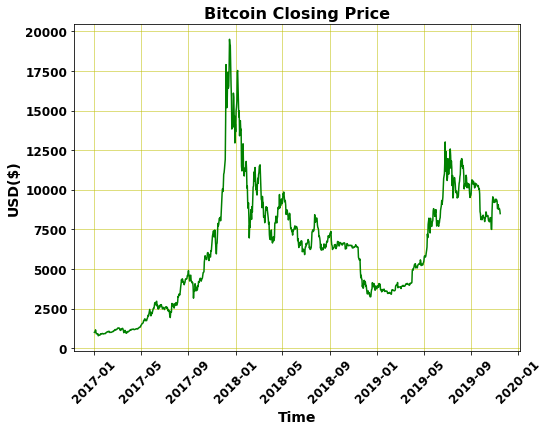

In [10]:
plt.figure(figsize = (8,6))
plt.plot(dfClose, color='g')
plt.title("Bitcoin Closing Price", weight='bold', fontsize=16)
plt.xlabel('Time', weight='bold', fontsize=14)
plt.ylabel('USD($)', weight ='bold', fontsize=14)
plt.xticks(weight = 'bold', fontsize=12, rotation=45)
plt.yticks(weight = 'bold', fontsize=12)
plt.grid(color='y', linewidth=0.5)

In [11]:
"""
과거 15일 동안의 비트코인 가격 입력 -> 오늘의 가격 예측
"""



'\n과거 15일 동안의 비트코인 가격 입력 -> 오늘의 가격 예측\n'

In [12]:
listOfAttribute = ['Close']
listOfPrevTInstants = []
for i in range(1, 16):
    listOfPrevTInstants.append(i)
listOfPrevTInstants # 하루전부터 25일 전까지를 나타내는

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [13]:
df.head(20)
# """
# Colounms: Close(1/15)       d-1(1/14),    d-2.... t-15
#           831.53            821.80

# """

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.66,1003.08,958.70,998.33,998.33,147775008
1,2017-01-02,998.62,1031.39,996.70,1021.75,1021.75,222184992
2,2017-01-03,1021.60,1044.08,1021.60,1043.84,1043.84,185168000
3,2017-01-04,1044.40,1159.42,1044.40,1154.73,1154.73,344945984
4,2017-01-05,1156.73,1191.10,910.42,1013.38,1013.38,510199008
5,2017-01-06,1014.24,1046.81,883.94,902.20,902.20,351876000
6,2017-01-07,903.49,908.59,823.56,908.59,908.59,279550016
7,2017-01-08,908.17,942.72,887.25,911.20,911.20,158715008
8,2017-01-09,913.24,913.69,879.81,902.83,902.83,141876992
9,2017-01-10,902.44,914.87,901.06,907.68,907.68,115808000


In [14]:
def createRegressorAtributes(df, attribute, listOfPrevTInstants): # 변수3개
    listOfPrevTInstants.sort()
    start=listOfPrevTInstants[-1] # 15(시작)
    end=len(df) #1049 (끝)
    df['datetime']=df.index # 2017-01-01 ~ 2019-11-15
    df.reset_index(drop=True)
    # print(df)
    dfCopy = df[start:end]
    dfCopy.reset_index(inplace=True, drop=True)

    for attr in attribute: #[15]
        foobar=pd.DataFrame()
        for prevT in listOfPrevTInstants: #[1~15]   prevT:1~15까지의 값 반복 
            #                                 15-prevT(1)=14: 1049-prevT(1)=1048
            newCol=pd.DataFrame(df[attr].iloc[(start-prevT) : (end-prevT)])
            newCol.reset_index(drop=True, inplace=True)
            newCol.rename(columns={attr:'{}_(t-{})'.format(attr,prevT)},inplace=True)
            foobar=pd.concat([foobar, newCol], sort=False, axis=1)
        dfCopy=pd.concat([dfCopy, foobar], sort=False, axis=1)
    dfCopy.set_index(['datetime'], drop=True, inplace=True)
    return dfCopy




In [15]:
dfNew=createRegressorAtributes(dfClose, listOfAttribute, listOfPrevTInstants)
print(dfNew.head())

Close  Close_(t-1)  Close_(t-2)  Close_(t-3)  Close_(t-4)  \
datetime                                                                 
2017-01-16  831.53       821.80       818.41       823.98       804.83   
2017-01-17  907.94       831.53       821.80       818.41       823.98   
2017-01-18  886.62       907.94       831.53       821.80       818.41   
2017-01-19  899.07       886.62       907.94       831.53       821.80   
2017-01-20  895.03       899.07       886.62       907.94       831.53   

            Close_(t-5)  Close_(t-6)  Close_(t-7)  Close_(t-8)  Close_(t-9)  \
datetime                                                                      
2017-01-16       777.76       907.68       902.83       911.20       908.59   
2017-01-17       804.83       777.76       907.68       902.83       911.20   
2017-01-18       823.98       804.83       777.76       907.68       902.83   
2017-01-19       818.41       823.98       804.83       777.76       907.68   
2017-01-20       821

In [26]:
from keras.layers import *
from keras.models import *
from keras.optimizers import SGD

In [27]:
inputLayer =Input(shape=(15), dtype='float32')
dense1= Dense(60, activation='linear')(inputLayer)
dense2= Dense(60, activation='linear')(dense1)
dropLayer=Dropout(0.2)(dense2)
outputLayer=Dense(1, activation='linear')(dropLayer)

In [28]:
model = Model(inputs=inputLayer, outputs= outputLayer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3660      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 4,681
Trainable params: 4,681
Non-trainable params: 0
_________________________________________________________________


In [16]:
dfNew.shape # (1034, 16)
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1034 entries, 2017-01-16 to 2019-11-15
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1034 non-null   float64
 1   Close_(t-1)   1034 non-null   float64
 2   Close_(t-2)   1034 non-null   float64
 3   Close_(t-3)   1034 non-null   float64
 4   Close_(t-4)   1034 non-null   float64
 5   Close_(t-5)   1034 non-null   float64
 6   Close_(t-6)   1034 non-null   float64
 7   Close_(t-7)   1034 non-null   float64
 8   Close_(t-8)   1034 non-null   float64
 9   Close_(t-9)   1034 non-null   float64
 10  Close_(t-10)  1034 non-null   float64
 11  Close_(t-11)  1034 non-null   float64
 12  Close_(t-12)  1034 non-null   float64
 13  Close_(t-13)  1034 non-null   float64
 14  Close_(t-14)  1034 non-null   float64
 15  Close_(t-15)  1034 non-null   float64
dtypes: float64(16)
memory usage: 137.3 KB


In [17]:
ex1 = pd.DataFrame(np.vstack([list('abcde'),
                            np.round(np.random.rand(3,5),2)]).T,
                            columns=['c1', 'c2', 'c3', 'c4'])
ex1

,c1,c2,c3,c4
0,a,0.92,0.59,0.59
1,b,0.83,0.14,0.52
2,c,0.74,0.3,0.06
3,d,0.14,0.87,0.18
4,e,0.4,0.37,0.27


In [18]:
ex2 = ex1.set_index('c1')
ex2

,c2,c3,c4
c1,,,
a,0.92,0.59,0.59
b,0.83,0.14,0.52
c,0.74,0.3,0.06
d,0.14,0.87,0.18
e,0.4,0.37,0.27


In [19]:
ex2.set_index('c2')

,c3,c4
c2,,
0.92,0.59,0.59
0.83,0.14,0.52
0.74,0.3,0.06
0.14,0.87,0.18
0.4,0.37,0.27


In [20]:
ex2

,c2,c3,c4
c1,,,
a,0.92,0.59,0.59
b,0.83,0.14,0.52
c,0.74,0.3,0.06
d,0.14,0.87,0.18
e,0.4,0.37,0.27


In [21]:
ex2.reset_index()

,c1,c2,c3,c4
0,a,0.92,0.59,0.59
1,b,0.83,0.14,0.52
2,c,0.74,0.3,0.06
3,d,0.14,0.87,0.18
4,e,0.4,0.37,0.27


In [22]:
ex2

,c2,c3,c4
c1,,,
a,0.92,0.59,0.59
b,0.83,0.14,0.52
c,0.74,0.3,0.06
d,0.14,0.87,0.18
e,0.4,0.37,0.27


In [23]:
ex2.reset_index(drop=True)

,c2,c3,c4
0,0.92,0.59,0.59
1,0.83,0.14,0.52
2,0.74,0.3,0.06
3,0.14,0.87,0.18
4,0.4,0.37,0.27


In [24]:
from keras.layers import*
from keras.models import*
from keras.optimizers import SGD

In [25]:
Input(shape=(15)) # 15일 data ->특정일 종가 예측 
Dense(60, activation='linear')(InputLayer)

AttributeError: type object 'InputLayer' has no attribute 'shape'